In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import fatiguelife

import os, glob

In [27]:
def plot_corr(data, figsize=(15,15)):
    '''
    Plot correlation 
    Args:
    - data: pd dataframe
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(corr, mask=mask, square=True, 
                         vmin= -1, vmax=1,
                         cmap='RdBu_r', center=0, annot=True,
                        annot_kws={'fontsize':8})

In [28]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/CopulaGAN_simulated_data_survival.csv'))

In [29]:
data_f = data.drop(['Observed', ], axis=1)

### Plotting

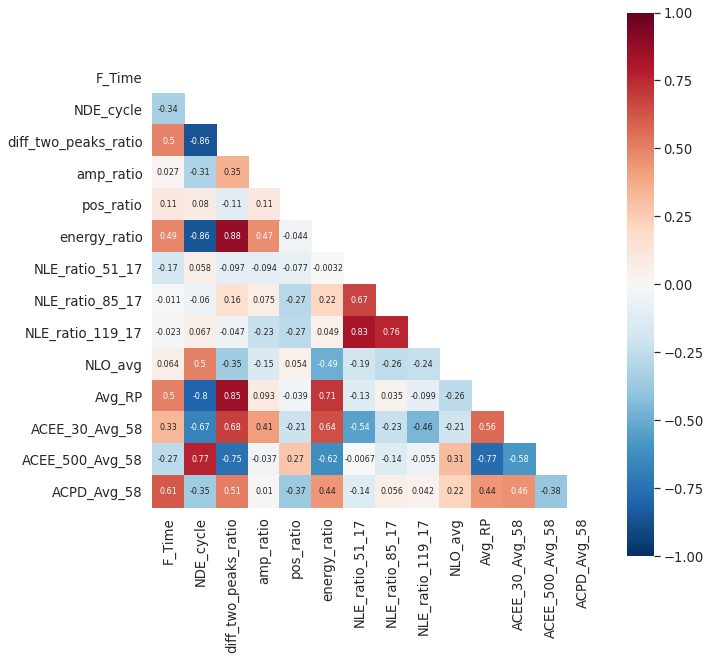

In [30]:
plot_corr(data_f, figsize=(10,10))

In [ ]:
sns.set_style('white')
sns.pairplot(data.drop('Observed', axis=1), hue='NDE_cyle')

In [31]:
data.drop('Observed', axis=1).columns[1:]

Index(['NDE_cycle', 'diff_two_peaks_ratio', 'amp_ratio', 'pos_ratio',
       'energy_ratio', 'NLE_ratio_51_17', 'NLE_ratio_85_17',
       'NLE_ratio_119_17', 'NLO_avg', 'Avg_RP', 'ACEE_30_Avg_58',
       'ACEE_500_Avg_58', 'ACPD_Avg_58'],
      dtype='object')

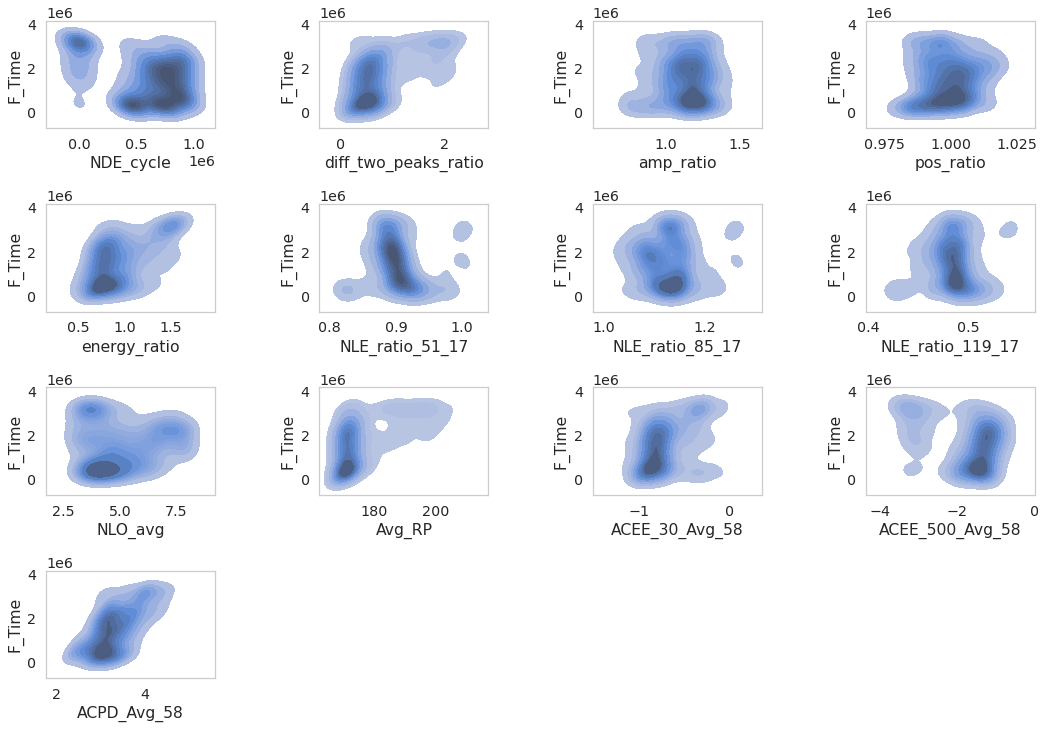

In [35]:
sns.set(font_scale=1.3)
sns.set_style("whitegrid", {'axes.grid' : False})


fig, axes = plt.subplots(4, 4,  sharex=False, sharey=False, figsize=(15,10))
plt.tight_layout(h_pad=3, w_pad=3)

for ax, col in zip(axes.flatten(), data.drop('Observed', axis=1).columns[1:]):
    
    sns.kdeplot(x=col, y='F_Time', data=data, fill=True, ax=ax)

fig.delaxes(axes[3,3])
fig.delaxes(axes[3,2])
fig.delaxes(axes[3,1])

In [33]:
test = pd.melt(data_f, 
               id_vars=['F_Time'])

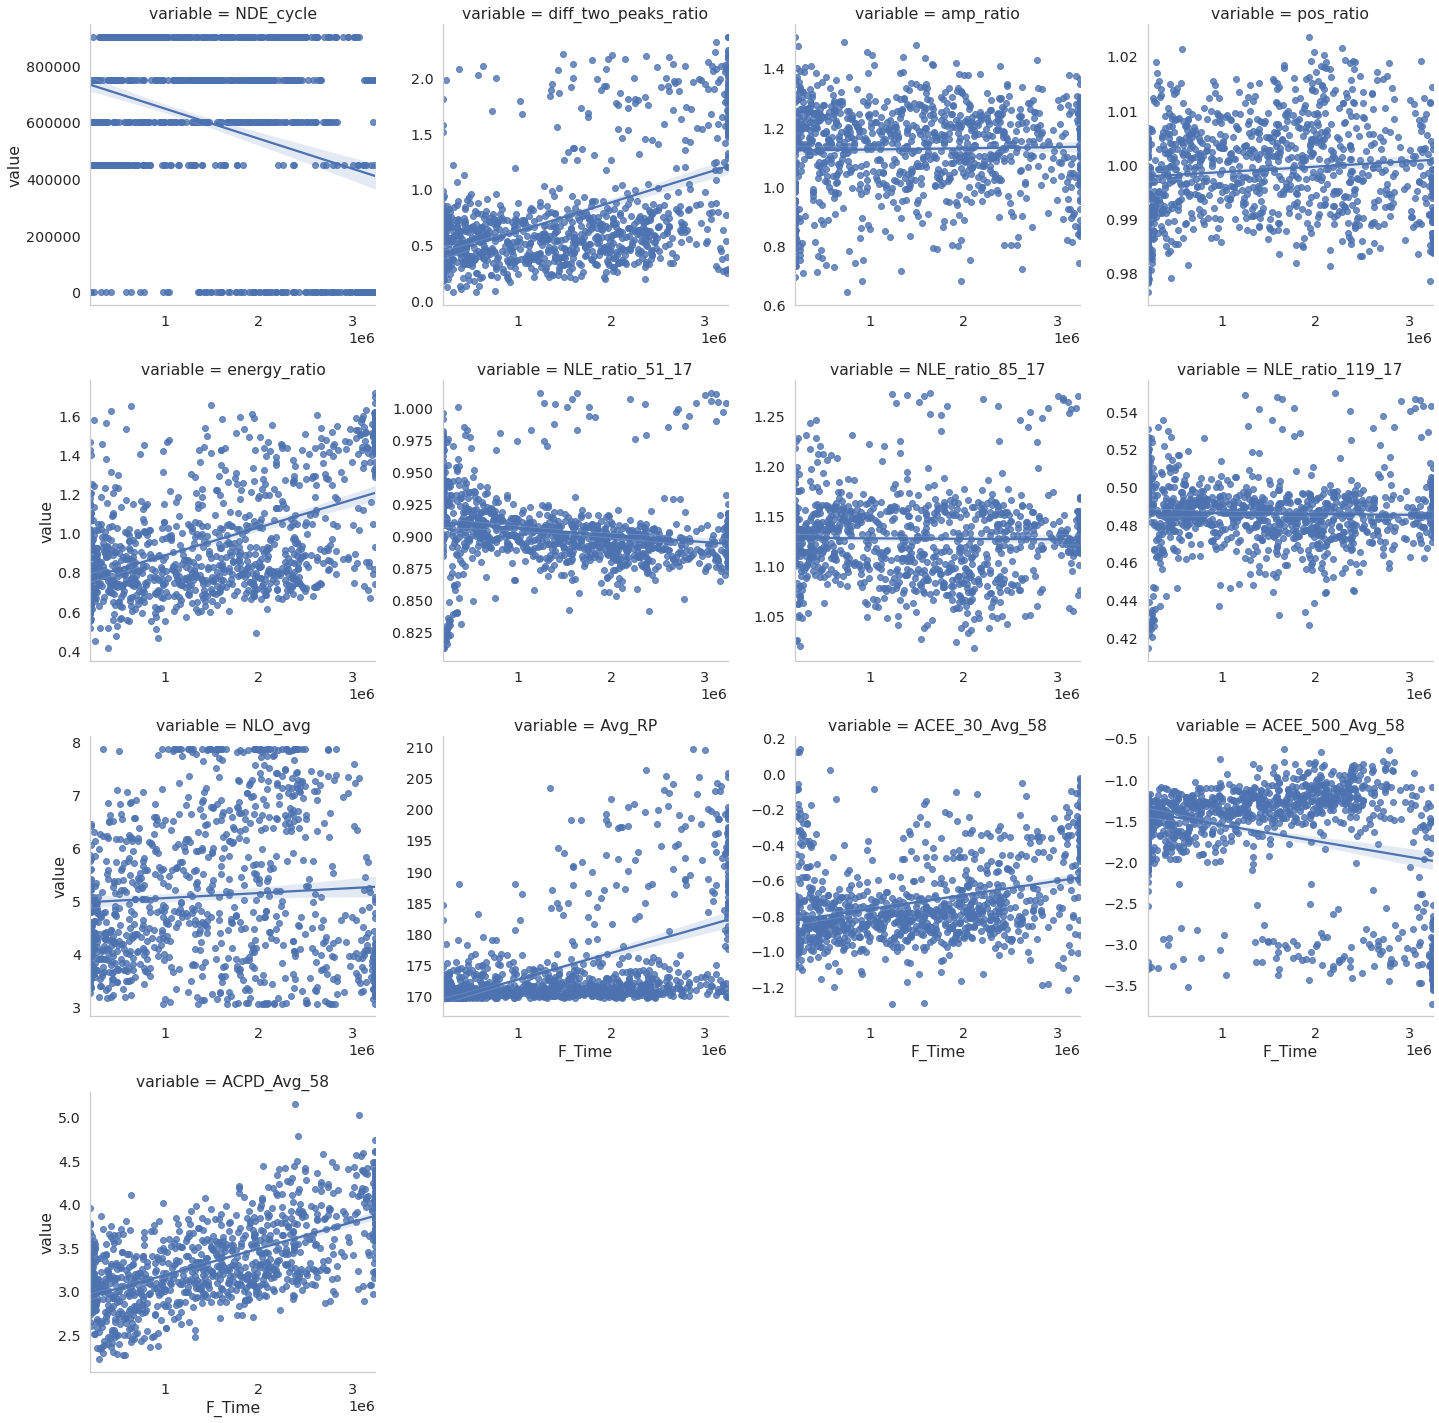

In [34]:
sns.lmplot(x='F_Time', y='value', data=test, 
           col='variable', col_wrap=4,
           sharey=False, sharex=False)

In [36]:
data.head()

,Observed,F_Time,NDE_cycle,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio,NLE_ratio_51_17,NLE_ratio_85_17,NLE_ratio_119_17,NLO_avg,Avg_RP,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
0,True,4.696176e+05,600000,0.652425,1.246098,0.997119,0.904570,0.920096,1.088206,0.467396,5.735330,175.609656,-0.770646,-1.285146,3.326268
1,True,3.258237e+05,450000,0.720146,1.262309,0.993423,0.980101,0.857370,1.101848,0.467855,3.645883,169.717689,-0.581949,-1.358144,2.985542
2,False,1.163226e+06,750000,0.563658,1.160935,0.996580,0.750480,0.884058,1.077712,0.470394,7.851831,170.982320,-0.769570,-1.502093,3.510375
3,True,1.845031e+06,900000,0.514807,1.037140,1.000231,0.737361,0.907228,1.150152,0.488943,5.009504,171.280515,-1.024741,-1.227602,2.845183
4,True,1.453082e+06,900000,0.379343,1.170794,0.998513,0.826376,0.896547,1.162720,0.488752,5.828494,170.252894,-0.828375,-1.248879,3.067759


In [37]:
c, loc, scale = fatiguelife.fit(data.F_Time)
c, loc, scale

(149.23086870264999, 200006.99919192318, 59.89739696065212)

In [38]:
fatiguelife.rvs(c, loc, scale)

225737.32547626804

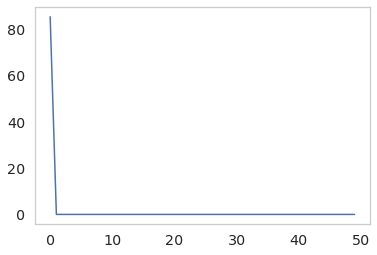

In [39]:
plt.plot(fatiguelife.pdf(np.linspace(200007, 361633), c, loc, scale))

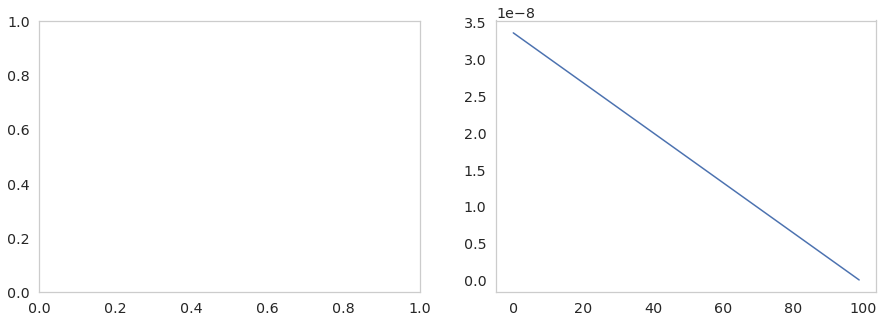

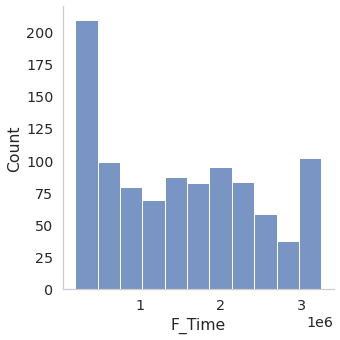

In [41]:

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0] = plt.plot(np.linspace(fatiguelife.pdf(200007, c), fatiguelife.pdf(3245267, c), 100))

axes[1] = sns.displot(x=data['F_Time'], kind='hist')

<AxesSubplot:xlabel='F_Time', ylabel='Density'>

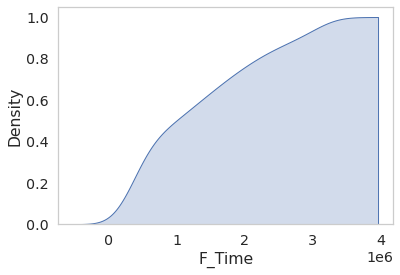

In [30]:
sns.kdeplot(x=data['F_Time'], shade=True, cumulative=True)

In [ ]:
np.linspace(fatiguelife.ppf(0.01, c)